
# Project Name: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

We need to find out what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



<a id='questions'></a>
## Questions

1. What age range do most patients fall in? What is the relationship with show ups?
2. Does the patient sickness have an impact on their show up(Hypertension, Diabetes, Alcoholism, Handicap)
3. What neighbourhood has the highest number of patients? what is the impact on the rate of show up?
4. What proportion of male and female patients showed up for their appointments?




Lets start by importing necessary libraries!

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#Loading datasets
df = pd.read_csv('no_show_appointments.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#No of rows and columns
df.shape

(110527, 14)

In [6]:
#Statistical summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#check for null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#check for duplicates
df.duplicated().sum()

0


### Data Cleaning 
 Here's a list of what i did
1. I renamed the columns all to lower characters to enable easy manipulation.
2. i deleted the PATIENT ID column as it wasnt formatted properly and it wasnt important to the analysis.
3. I converted the datatype of the APPOINTMENT AND SCHEDULED DAY columns to Datetime format to aid the analysis.

In [9]:
# converting columns to lower characters for easy manipulation
df.columns =  ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day','age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_recieved', 'no_show']

In [10]:
# Deleting the patient id column
df.drop('patient_id', axis = 1, inplace = True)

In [11]:
#convert datatype for schedule and appointment days to DateTime
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

<a id='eda'></a>
## Exploratory Data Analysis





### Question 1: What age range does most patient fall in

Here, i got the value counts of all ages in the dataframe. Then i plotted a graph to show the range of age distribution.


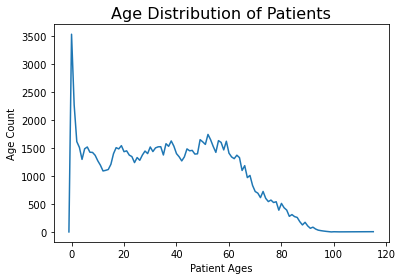

In [12]:
#Age count of patients
age_count = df.age.value_counts().sort_index()
plt.plot(age_count)
plt.title('Age Distribution of Patients', size = 16)
plt.ylabel('Age Count')
plt.xlabel('Patient Ages');

From the chart above, we can see that majority of patients fall within ages 0-2,and then 50 - 70.

------

### What is the relationship between age and show up 

This is divided into 3 steps:
- I divided the data into two, differentiating information of patients that showed up from those that didnt.
- I got the age count(*value_counts*) from the two data which i divided
- I plotted a graph to demonstrate the result

In [13]:
#Differentiating data of those that showed up with those who didnt
show = df.no_show == 'No'
noshow = df.no_show == 'Yes'

In [14]:
#Age count of patients that showed up
age_show = df.age[show].value_counts().sort_index()

#Age count of patients that didnt show up
age_noshow = df.age[noshow].value_counts().sort_index()

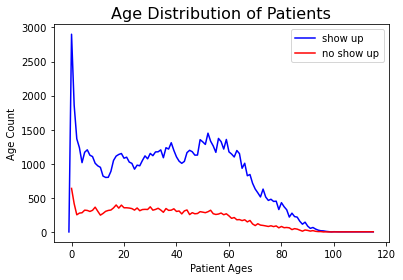

In [15]:
# Age distribution for patients (those that showed and those that didnt)
plt.plot(age_show,color = 'blue', label = 'show up')
plt.plot(age_noshow, color = 'red', label = 'no show up')
plt.title('Age Distribution of Patients', size = 16)
plt.ylabel('Age Count')
plt.xlabel('Patient Ages');
plt.legend()
plt.show();

From the chart, We can see that patients within **ages 0-2 and 50-60 showed up** more and patients within **ages 18-30  and 90- 120 didnt show up** more

--------

###  What is the relationship between age and sickness
I had to groupby the patients illnesses and then got the mean ages of patients with such illness. This will help to determine the age group which majorly possess each kind of illness and then plot a bar chart to demonstrate such for each illness.

To do this, I:
1. Created a function for plotting future bar charts with various axes.
2. Called the function

In [16]:
def plot_bar_axes(variable,axes,ax_size, ax_count, colors):
    
    fig, axes = plt.subplots(ax_size[0], ax_size[1], figsize = (15,9))
    ax_= axes.ravel()
    for m,n in enumerate(variable):
        n_mean_age = df.groupby(n)['age'].mean() 
        n_mean_age.plot.bar(color = colors[m], ax = ax_[m], title = f'Relationship between {n} and age', label = None)


    

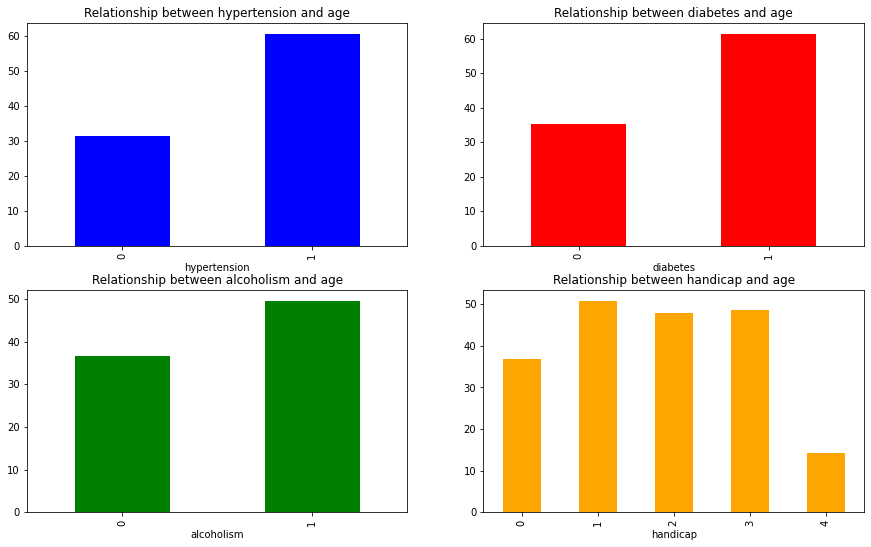

In [17]:
# plotting the graph(calling the function)   
    
plot_bar_axes(['hypertension', 'diabetes', 'alcoholism','handicap'],
              axes = (('ax1', 'ax2'), ('ax3', 'ax4')),
              ax_size = [2, 2],ax_count=['ax1','ax2','ax3','ax4'],
              colors=['blue','red', 'green', 'orange'])

From the bar chart above, we can deduce that:
- patients within ages 50-60 tend to have more hypertention and diabetes ilness. 
- patients within ages 30-40 tend to have more alcoholism cases


-------

### Question 2: Is there a relationship between different sickness and the rate of show up

Here i grouped by the no_show column, ad then i got the mean of all sickness. 

This is to demonstrate whether the kind of sickess motivates patients to show up for their appointments. I also plotted a bar chart to visualise the results.

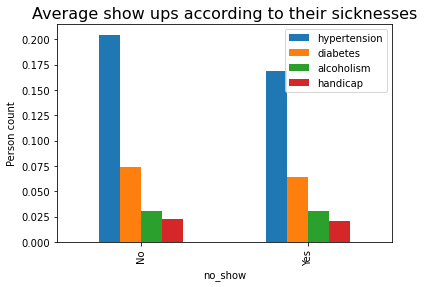

In [18]:
# Groupping different illnesses by the no show column.
df.groupby('no_show')[['hypertension', 'diabetes','alcoholism', 'handicap']].mean().plot(kind = 'bar')
plt.title('Average show ups according to their sicknesses', size = 16)
plt.ylabel('Person count');


There is a positive relationship. From the chart above, we can see that **patients with underlying sicknesses show up more**
Particularly patients with Hypertension ad Diabetes.

______________

### Question 3 Which Neighbourhood has the highest number of patients

Here i used the divided dataset to check for the counts of various hospital locations for the 2 datasets(those that showed up and those that didnt)

In [19]:
#Differtiating data of those that showed up with those who didnt
show = df.no_show == 'No'
noshow = df.no_show == 'Yes'

In [20]:
# Patients counts according to their neighbourhood
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [21]:
# number of patients that showed up and their neighbourhood
df.neighbourhood[show].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [22]:
# number of patients that showed up and their neighbourhood
df.neighbourhood[noshow].value_counts().sort_values(ascending = False)

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

From the analysis, we can see that JARDIM CAMBURI has the highest number of patients and PARQUE INDUSTRIAL has the lowest number of patients.
This influenced the number of show ups from the neighbourhood as JARDIM CAMBURI has the highest number patients who showed up, likewise the highest number of patients who didnt show up.

---------------------

### What was the impact of sms recieved on the show up rate

I got the value counts of sms recieved from the divided dataset(*patients that showed up and those who didnt*).

I defined a function which i will use to plot all bar charts going forward so i dont have to keep repeating same funtion.

I called the function demonstating the rate of patients show up relative to the sms recieved.

In [23]:
sms_show = df.sms_recieved[show].value_counts() # Number of patients that recieved sms and showed up
sms_noshow = df.sms_recieved[noshow].value_counts() # Number of patients that recieved sms and didnt showed up

In [24]:
def plot_bar(variables, colors,  xlabel=None, ylabel=None,legend = None, title=None):
    for m,n in enumerate(variables):
        n.plot.bar(color = colors[m])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels = legend)
    plt.title(title)
    plt.show();

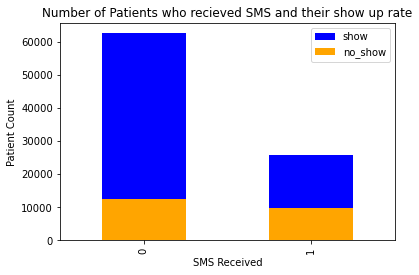

In [25]:
plot_bar([sms_show,sms_noshow], colors= ['blue', 'orange'], legend= ['show', 'no_show'],
         xlabel= 'SMS Received',ylabel='Patient Count', 
         title='Number of Patients who recieved SMS and their show up rate')

There was no impact as **patients who didnt recieve sms showed up more than patients who did**

---------------

### Is there a relationship between scholarship and showup 

I got the value counts of the scholarship column from the divided dataset(*patients that showed up and those who didnt*). Then i plotted a chart to visually represent it.


In [26]:
#Value counts of scholarship receipients that showed up ad those that didnt
sch_count_show = df.scholarship[show].value_counts()
sch_count_noshow = df.scholarship[noshow].value_counts()

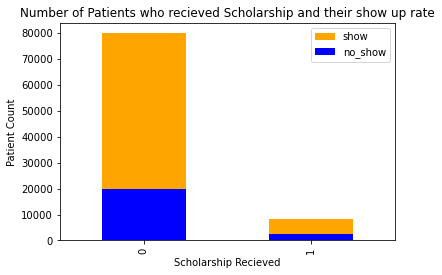

In [32]:
#Plotting the chart by calling an existing function
plot_bar([sch_count_show,sch_count_noshow], colors= ['orange', 'blue'], legend= ['show', 'no_show'],
         xlabel= 'Scholarship Recieved',ylabel='Patient Count', 
         title='Number of Patients who recieved Scholarship and their show up rate')

There was no impact as **patients with no scholarship showed up more than patients who had**

--------------

### Question 4:  What is the proportion of males and females that showed up for their appointment

Here i did 4 things:
1. I got the value counts of gender in the dataset
2. I got the value counts of gender in the divided dataset(Those that showed up and those that didnt)
3. I got the proportion by dividing no.1 from no.2.
4. I plotted the graph to demonstrate the proportion of both genders that showed up and those that didnt


In [ ]:
# Dividing dataframe  based on show up
show = df.no_show == 'No'

noshow = df.no_show == 'Yes'

In [28]:
#total gender count
total = df.gender.value_counts()

In [29]:
# Gender counts for those that showed up and those who didnt

count_show = df.gender[show].value_counts() # gender count for persons who showed up
count_noshow = df.gender[noshow].value_counts() # gender count for persons who didnt showed up

In [30]:
# Getting the proportion of gender count to the total count in the population

proportion_show = count_show/total # proportions for genders who showed up
proportion_noshow = count_noshow/total # proportions for genders who didnt showed up

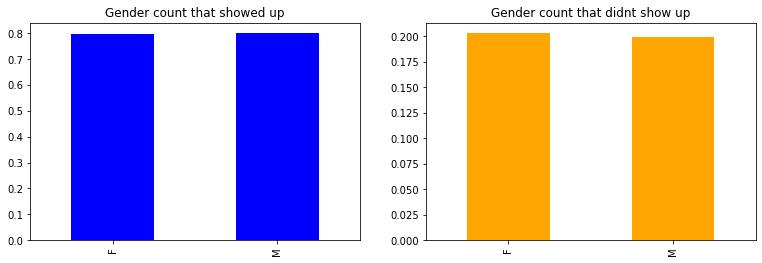

In [31]:
#plotting the bar charts
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))

#Items needed in the loop function
list = [proportion_show, proportion_noshow]
colors = ['blue', 'orange']
titles = ['Gender count that showed up', 'Gender count that didnt show up']
axes = [ax1, ax2]


for m,n in enumerate(list):
    n.plot.bar(color = colors[m], ax = axes[m], title = titles[m])

plt.show();


There were more female patients than male patients. Due to the difference in gender count, we had to get the proportion in order to get a more accurate conclusion.

From the final graph we can see that the **proportion of males that showed up are *MORE* than the proprtion of females** who showed up for their appointments.

_________________

<a id='conclusions'></a>
## Conclusion

1. Majority of patients are toddlers(ages 0-2) and the elderly (ages 50 and above). This could be as a result of their illness. Its is known that older people tend to have more underlying illnesses. From the data(*view chart above*), We can see that patients with underlying sickness tend to show up more.

2. The Location of the hospital(Neighorhood) also have an impact on whether patients show up as more patients from JARDI Carbim tend to show up for their appointment.

3. We can also deduce that more males tend to show up for their appointments although there are more female patients in the hospital.
 
Therefore, factors to know in order to predict if a patient will show up for their appointment include, *gender, age, illness and the hospital location*

<a id='limitations'></a>
## Limitations

- From the dataset given, The dependent variable was not numerical, this made it difficult to check for relationship/ correlation between the other variables.
- The data was not sufficient to prove my findings. We cannot draw conclusions based on a one month data. The time period covered in the data is to short to draw accurate conclusions.

